In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


CPU times: user 109 ms, sys: 7.88 ms, total: 117 ms
Wall time: 3.21 s


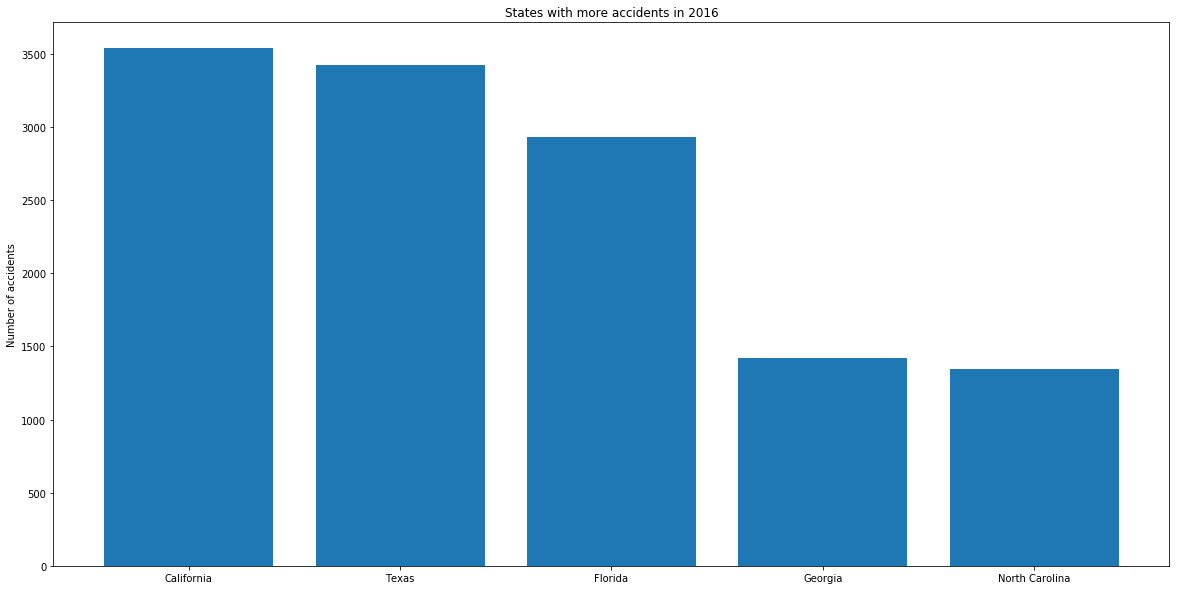

In [18]:
%%time
# https://github.com/SohierDane/BigQuery_Helper
from bq_helper import BigQueryHelper

import matplotlib.pyplot as plt

accidents = BigQueryHelper(active_project="bigquery-public-data",
                           dataset_name="nhtsa_traffic_fatalities")

accidents_query =  """
                     SELECT COUNT(consecutive_number) AS crashes, state_name
                     FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016` 
                     GROUP BY state_name
                     ORDER BY crashes DESC                   
                   """
state_with_more_accidents = accidents.query_to_pandas_safe(accidents_query)

plt.bar( state_with_more_accidents.state_name.head(), state_with_more_accidents.crashes.head())
plt.ylabel("Number of accidents")
plt.title("States with more accidents in 2016")

In [19]:
%%time

role_query =  """
                SELECT person_type_name AS role , COUNT(person_type_name) as number
                FROM   `bigquery-public-data.nhtsa_traffic_fatalities.person_2016` 
                GROUP BY role
                ORDER BY number DESC
              """
roles = accidents.query_to_pandas_safe(role_query)



CPU times: user 40.1 ms, sys: 716 µs, total: 40.8 ms
Wall time: 2.12 s


In [20]:
roles

,role,number
0,Driver of a Motor Vehicle In-Transport,52399
1,Passenger of a Motor Vehicle In-Transport,25907
2,Pedestrian,6506
3,Bicyclist,878
4,Occupant of a Motor Vehicle Not In-Transport,359
5,Person on Personal Conveyances (Since 2007),186
6,Unknown Occupant Type in a Motor Vehicle In-Tr...,148
7,Persons In/On Buildings (Since 2007),46
8,Occupant of a Non-Motor Vehicle Transport Device,38
9,Other Cyclist,5


In [22]:
%%time
accidents = BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="nhtsa_traffic_fatalities")
month_query = """
                SELECT month_of_crash, COUNT(consecutive_number) as total
                FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016`
                GROUP BY month_of_crash
                ORDER BY total  DESC  
             """
accidents_per_month = accidents.query_to_pandas_safe(month_query)



CPU times: user 100 ms, sys: 0 ns, total: 100 ms
Wall time: 3.25 s


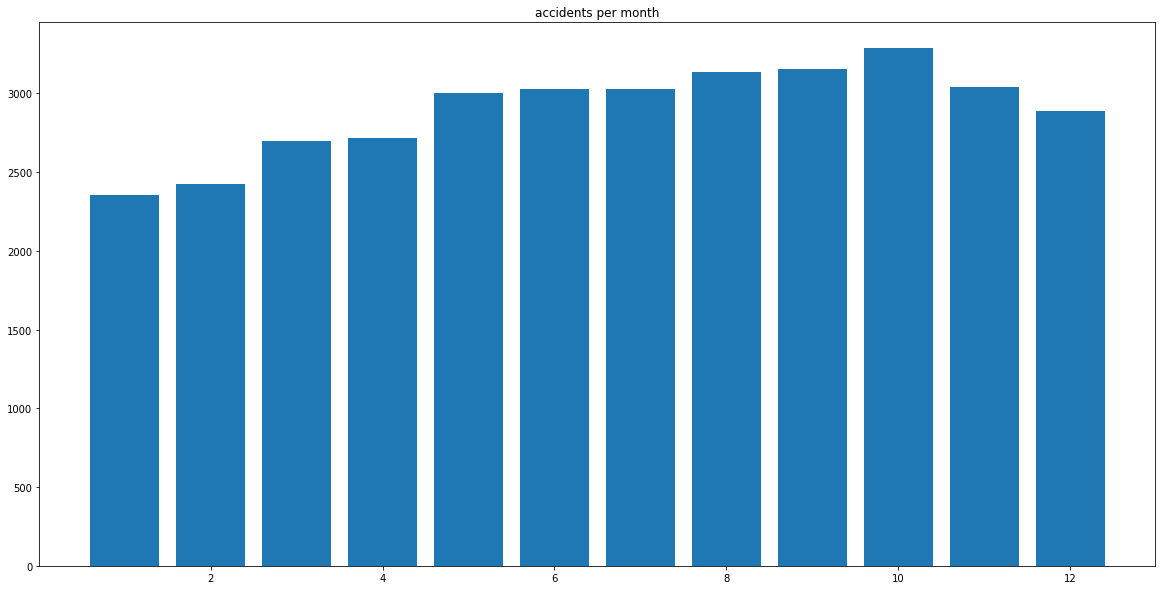

In [10]:
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(accidents_per_month.month_of_crash , accidents_per_month.total)
plt.title("accidents per month")

plt.show()
plt.close()

In [24]:
%%time

q_accidets = '''
SELECT
  state_number,
  hour_of_crash,
  day_of_crash,
  month_of_crash,
  day_of_week,
  functional_system_name,
  land_use_name,
  route_signing_name,
  type_of_intersection,
  work_zone,
  light_condition_name,
  atmospheric_conditions_name,
  school_bus_related,
  number_of_drunk_drivers  
FROM
  `bigquery-public-data.nhtsa_traffic_fatalities.accident_{0}`
ORDER BY
  state_number
'''
accidents_general_df = accidents.query_to_pandas(q_accidets.format(2015))

CPU times: user 1.52 s, sys: 51.5 ms, total: 1.58 s
Wall time: 8.83 s


In [26]:
accidents_general_df.head()

,state_number,hour_of_crash,day_of_crash,month_of_crash,day_of_week,functional_system_name,land_use_name,route_signing_name,type_of_intersection,work_zone,light_condition_name,atmospheric_conditions_name,school_bus_related,number_of_drunk_drivers
0,1,6,25,6,5,Principal Arterial – Other,Rural,State Highway,Not an Intersection,None,Daylight,"Fog, Smog, Smoke",No,0
1,1,2,21,6,1,Minor Arterial,Urban,Local Street – Municipality,Not an Intersection,None,Dark – Not Lighted,Cloudy,No,1
2,1,1,14,9,2,Minor Arterial,Rural,State Highway,Not an Intersection,None,Dark – Not Lighted,Clear,No,0
3,1,13,13,1,3,Minor Arterial,Urban,Local Street – Municipality,T-Intersection,None,Daylight,Cloudy,No,0
4,1,10,2,7,5,Major Collector,Rural,County Road,Not an Intersection,None,Daylight,Cloudy,No,0


In [27]:
QUERY = """
    SELECT
        atmospheric_conditions_1_name,
        count(atmospheric_conditions_1_name) as atmospheric_conditions_1_name_count
    FROM
      `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016`
    GROUP BY atmospheric_conditions_1_name
    ORDER BY atmospheric_conditions_1_name_count ASC
        """

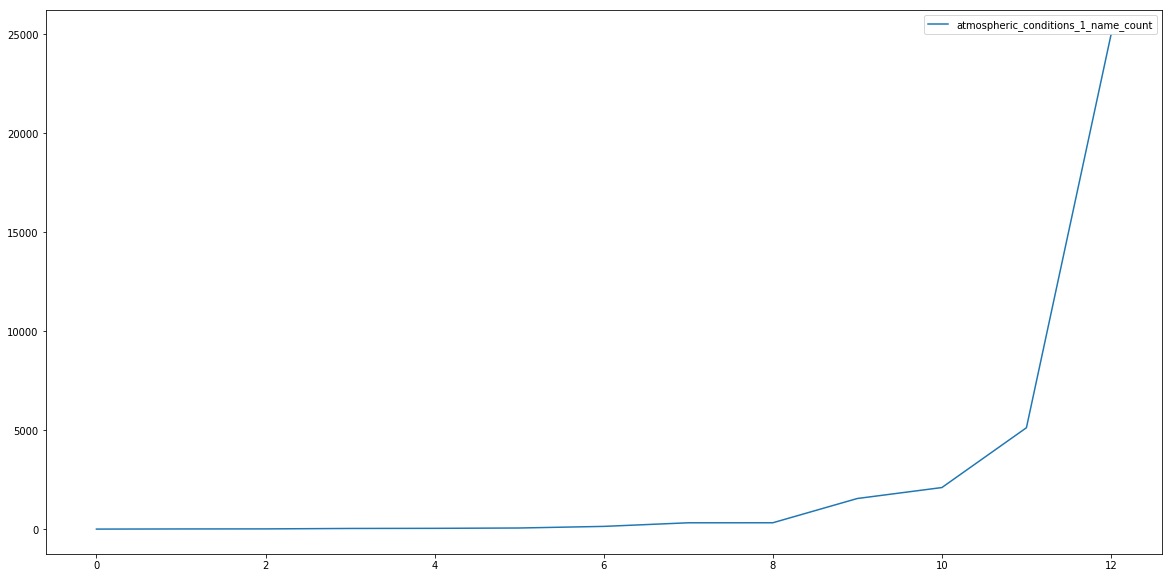

In [33]:


df_atmosphoric_condition_popular = accidents.query_to_pandas(QUERY)

df_atmosphoric_condition_popular.plot()
plt.show()



In [30]:
df_atmosphoric_condition_popular

,atmospheric_conditions_1_name,atmospheric_conditions_1_name_count
0,Blowing Snow,10
1,Freezing Rain or Drizzle,17
2,"Blowing Sand, Soil, Dirt",20
3,Severe Crosswinds,42
4,Other,48
5,"Sleet, Hail",65
6,Unknown,146
7,Snow,328
8,"Fog, Smog, Smoke",329
9,Not Reported,1554
